In [ ]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.graphics.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_json_summary import load_json_summary
from buscoplotpy.graphics.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')

                    for file in os.listdir():
                        if file.endswith(".json"):

                            version_tmp = load_json_summary(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

                    os.chdir(dirs[0])

                    version_fulltable = load_busco_fulltable('full_table.tsv', group=group, organism=organism, genome_version=genome_version)

                    os.chdir('../..')
                    
                    #karyoplot(karyotype_file='karyotype.tsv',
                    #          busco_fulltable=version_fulltable,
                    #          output_file='karyoplot.png',
                    #          title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                    #          chrs_limit=100,
                    #          dpi=300)
                    os.chdir('..')

            #organism_busco_barplot(df=organism_tmp,
            #                       out_path="./",
            #                       filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    #organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

Metaeuk karyoplot

In [2]:
karyo

,chr,start,end,color
0,FO082278.1,0,1352724,#21667a
1,FO082277.1,0,1122692,#21667a
2,FO082276.1,0,1091008,#21667a
3,FO082275.1,0,1037991,#21667a
4,FO082274.1,0,1019276,#21667a
5,FO082273.1,0,989707,#21667a
6,FO082272.1,0,955652,#21667a
7,FO082271.1,0,937610,#21667a
8,FO082270.1,0,895536,#21667a
9,FO082269.1,0,794368,#21667a


In [4]:
genes[genes['sequence'] == 'FO082278.1']['type'].value_counts()

type
exon    16
CDS     16
gene    15
mRNA    15
Name: count, dtype: int64

Il pacchetto è stato importato!


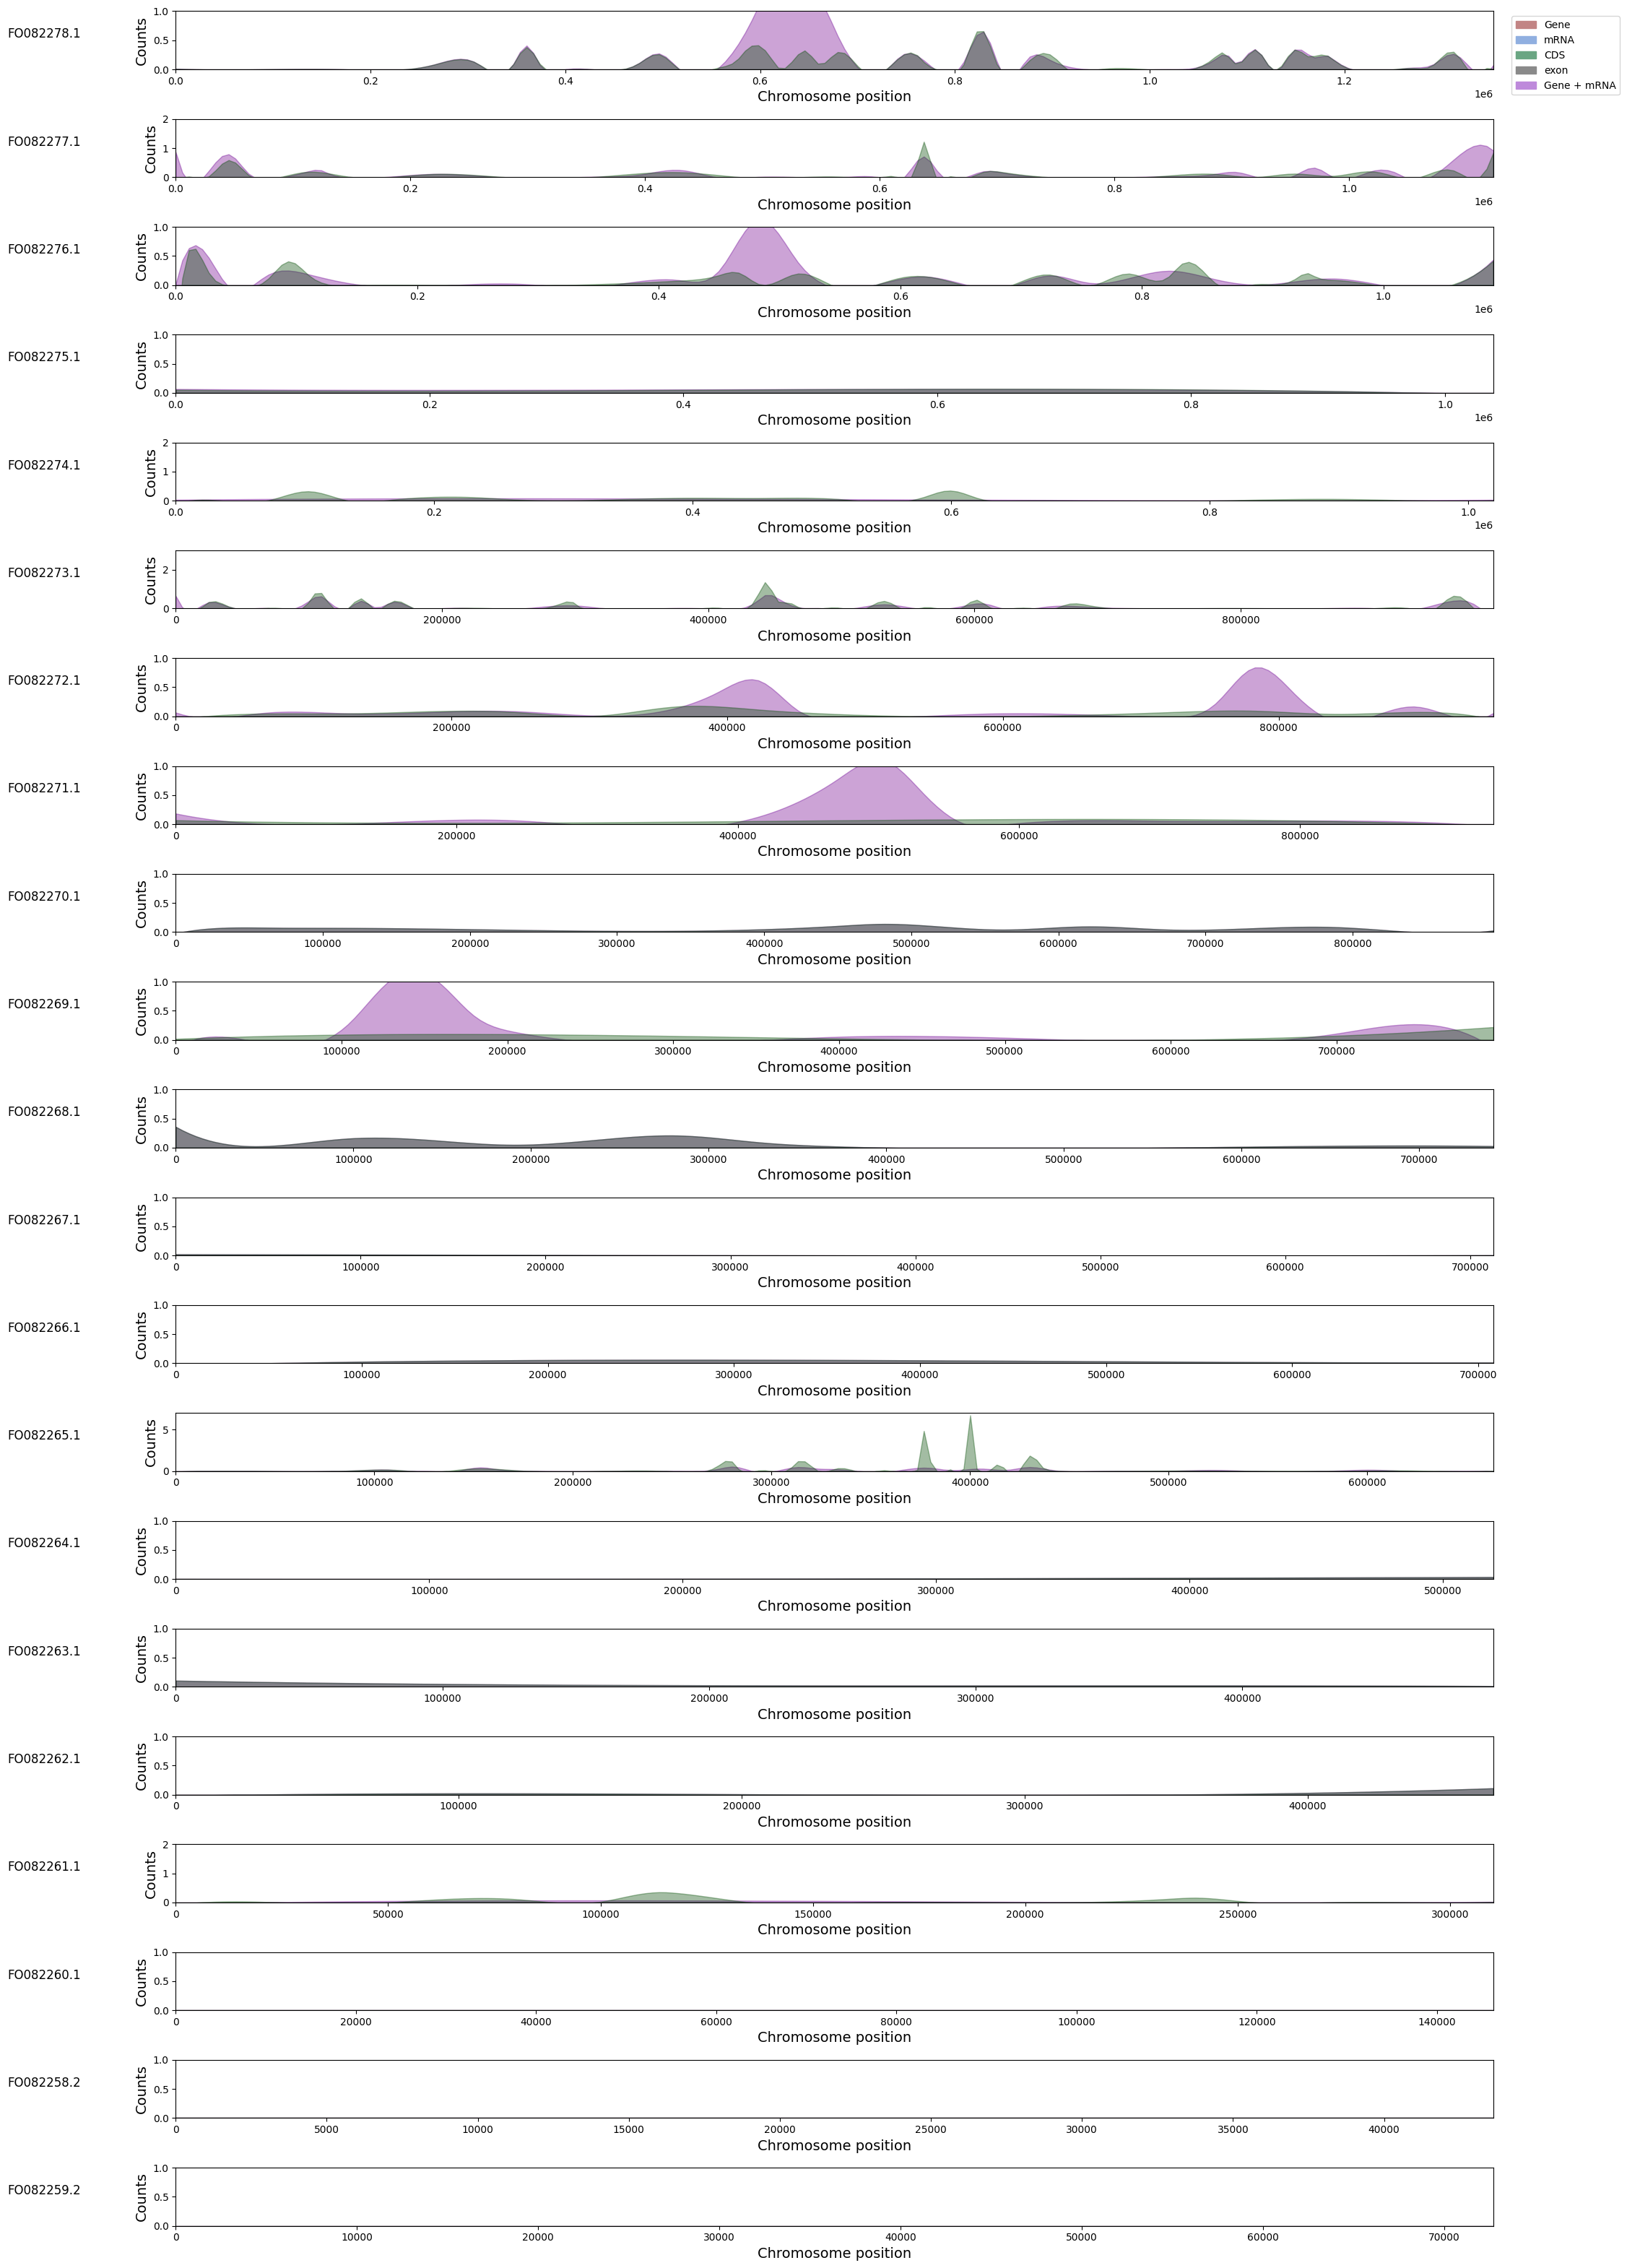

In [1]:
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates
from buscoplotpy.graphics.chromoplot import chromoplot
import pandas as pd

karyo = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
genes = load_metaeuk_coordinates('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/metaeuk_output/rerun_results/GCA_002220235.1_ASM222023v1_genomic.fna.gff')

chromoplot(karyotype=karyo, genes_dataframe=genes, bin_number=200, title='Chlorophyta - Bathycoccus prasinos 4', s=10)

In [ ]:
df = df[(df.type == 'gene') & (df.sequence == 'FO082278.1')]

In [ ]:
from buscoplotpy.graphics.chromoplot import chromoplot

chromoplot(karyotype=df, genes_dataframe=df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

fig, ax = plt.subplots()

START = 0
END   = 1352724

bins = np.linspace(0, END, 100)
counts = []

for i in range(len(bins) - 1):
    number_of_matches = len(df.loc[((df['start'] <= bins[i]) & (df['end'] >= bins[i])) | 
                                   ((df['start'] <= bins[i+1]) & (df['end'] >= bins[i+1])) |
                                   ((df['start'] >= bins[i]) & (df['end'] <= bins[i+1])), :])
    counts.append(number_of_matches)

X_Y_Spline = splrep(bins[1:], counts, s=15)

X = bins
Y = splev(X, X_Y_Spline)

# Add the gene density
ax2 = fig.add_axes([0.0, 1, 5,2])

ax2.plot(X, Y, color='black', linewidth=1)
#for index, row in df.iterrows():
#    ax2.plot([row.start, row.end], [index, index], ls='-', color='black', linewidth=1)
#
ax2.set_xlim(0, END)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(14)
centers = bins[:-1] + np.diff(bins) / 2
y = np.sin(centers / 2)

#plt.step(bins[:-1], y, where='post', label='step(where="post")')
plt.plot(bins[:-1], y, 'o--', color='grey', alpha=0.3)

#plt.stairs(y - 1, bins, baseline=None, label='stairs()')
#plt.plot(centers, y - 1, 'o--', color='grey', alpha=0.3)
#plt.plot(np.repeat(bins, 2), np.hstack([y[0], np.repeat(y, 2), y[-1]]) - 1,
#         'o', color='red', alpha=0.2)

plt.legend()
plt.title('step() vs. stairs()')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.5, 0.2, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(range(10), color='red')
ax2.plot(range(6)[::-1], color='green')

plt.show()

In [ ]:
import pandas as pd
import os
import re
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates

%matplotlib inline

# Insert the filename of the graph
filename = "metaeuk_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata', ]#'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')
                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]
                    
                    # We are now in run* directory
                    os.chdir(dirs[0])


                    for file in os.listdir('./metaeuk_output/rerun_results'):
                        if file.endswith(".gff"):

                            version_tmp = load_metaeuk_coordinates(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    ############# Warning ###################
                    os.chdir('../..')
                    
                    #karyoplot(karyotype_file='karyotype.tsv',
                    #          busco_fulltable=version_fulltable,
                    #          output_file='karyoplot.png',
                    #          title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                    #          chrs_limit=100,
                    #          dpi=300)
                    os.chdir('..')

            #organism_busco_barplot(df=organism_tmp,
            #                       out_path="./",
            #                       filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    #organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

BUSCO's barplot

In [ ]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.graphics.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_json_summary import load_json_summary
from buscoplotpy.graphics.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4"

df = pd.DataFrame()

for version in os.listdir(dir):
    if os.path.isdir(dir + '/' + version):
        os.chdir(dir + '/' + version)
        os.chdir('./busco_out')
        for f in os.listdir():
            if f.endswith(".json"):
                summary = load_json_summary(f)
                summary['version'] = version
                df = pd.concat([df, summary], axis=0, ignore_index=True)
        os.chdir('../..')
os.chdir('/home/lorenzo/Documenti/GitHub/BUSCO-Plot-Py/images')
df['group'] = 'Chlorophyta'
df['organism'] = 'Bathycoccus prasinos'
organism_busco_barplot(df=df, plt_show=True, filename=filename, out_path="./", dpi=200)

X_lim: 100 Y_lim: 20 dim: 4.0


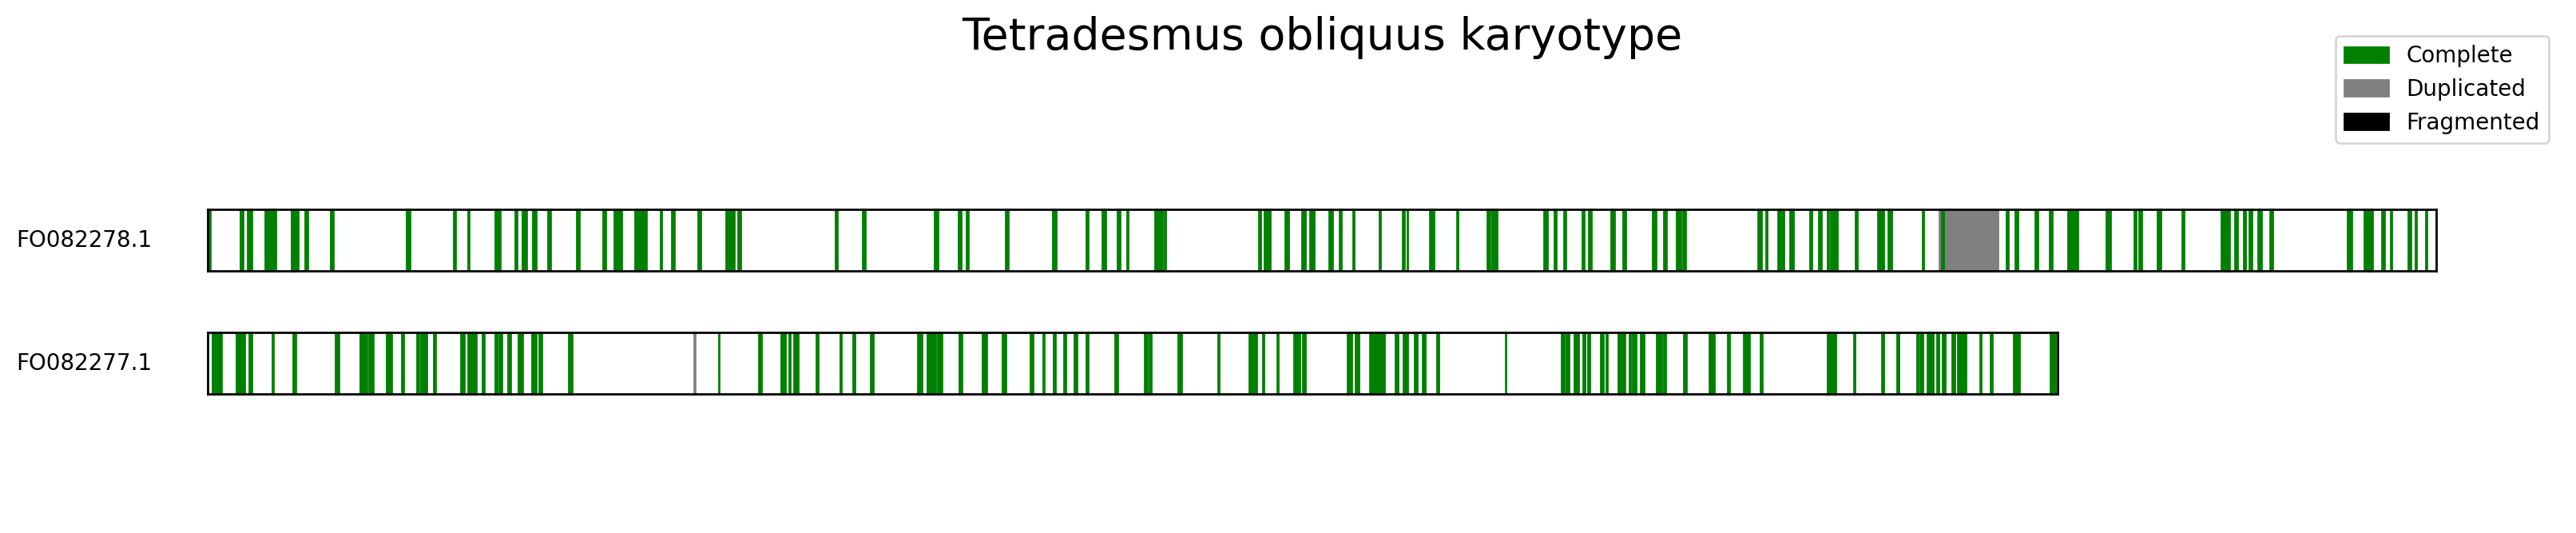

In [2]:
from buscoplotpy.graphics.karyoplot import karyoplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates
import pandas as pd

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Chloropicon primus'

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Tetradesmus obliquus'
genes_dataframe = load_metaeuk_coordinates('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/metaeuk_output/rerun_results/GCA_002220235.1_ASM222023v1_genomic.fna.gff')

karyoplot(karyotype=karyotype.iloc[:2, :],
          fulltable=full_table,
          title='karyotype',
          chrs_limit=500,
          dpi=200,
          plt_show=True,
          dim=5,
          #output_file='karyoplot1.png',
)

#full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
#karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
#karyotype['organism'] = 'Tetradesmus obliquus'
#
#karyoplot(karyotype=karyotype,
#          fulltable=full_table,
#          title='karyotype',
#          chrs_limit=500,
#          dpi=100,
#          plt_show=True,
#          dim=5,
#          palette='azure',
#          output_file='karyoplot2.png',
#)

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for the outer plot
fig, ax_outer = plt.subplots()
ax_outer.plot([1, 2, 3, 4], [10, 5, 20, 15], label='Outer Plot')
ax_outer.set_xlabel('Outer X-axis')
ax_outer.set_ylabel('Outer Y-axis')
ax_outer.legend()

# Create an axis for the inner plot using the coordinates of the outer plot
inner_x_start = 1.5
inner_y_start = 12
inner_width = 1.5
inner_height = 5

# Convert outer plot data coordinates to display coordinates
inner_x_start_disp, inner_y_start_disp = ax_outer.transData.transform((inner_x_start, inner_y_start))

# Convert inner plot dimensions to display coordinates
inner_width_disp, inner_height_disp = ax_outer.transData.transform((inner_width, inner_height))

# Create a rectangle for the inner plot using display coordinates
inner_rect = plt.Rectangle((inner_x_start_disp, inner_y_start_disp), inner_width_disp, inner_height_disp,
                           transform=fig.transFigure, color='orange', alpha=0.5)

# Add the rectangle to the figure
fig.patches.append(inner_rect)

# Display the figure
plt.show()
ax.position

In [ ]:
from buscoplotpy.graphics.synteny import horizontal_synteny_plot, vertical_synteny_plot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd


karyotype_1 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/karyotype.tsv', sep='\t')
karyotype_1['organism'] = 'Ostreococcus tauri'

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyotype_2 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype_2['organism'] = 'Bathycoccus prasinos'

ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

link_colors = {
    'CAID01000001.2': '#47a651',
    'FO082277.1': '#3f4c99',
    'FO082274.1': '#851d1d',
    'FO082278.1': '#ff9900',
}

horizontal_synteny_plot(ft_1=ft_1, ft_2=ft_2, 
                        karyotype_1=karyotype_1, 
                        karyotype_2=karyotype_2, 
                        dim=2, figsize=(30, 10), 
                        link_colors=link_colors, 
                        round_edges=False, dpi=100, 
                        straight_line=False,
                        output_path='synteny.png',
                        bbox_inches='tight',
                        plt_show=True)

In [ ]:
from buscoplotpy.graphics.synteny import horizontal_synteny_plot, vertical_synteny_plot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd


karyotype_1 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/karyotype.tsv', sep='\t')
karyotype_1['organism'] = 'Ostreococcus tauri'

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyotype_2 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype_2['organism'] = 'Bathycoccus prasinos'

ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

link_colors = {
    'CAID01000001.2': '#47a651',
    'FO082277.1': '#3f4c99',
    'FO082274.1': '#851d1d',
    'FO082278.1': '#ff9900',
}

vertical_synteny_plot(ft_1=ft_1, ft_2=ft_2, karyotype_1=karyotype_1, karyotype_2=karyotype_2, dim=1, figsize=(18, 10), link_colors=link_colors, dpi=100, straight_line=False, output_path='Vsynteny.png', plt_show=True)

In [ ]:
from buscoplotpy.graphics.synteny import generate_links
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalyticstitle_test_data/busco_tmp/tree/Chlorophyta/Tetradesmus_obliquus_5/GCA_030272055.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

# Show all columns pandas
pd.set_option('display.max_columns', None)

generate_links(ft_1=ft_1, ft_2=ft_2)